.
.
.
.
.
part of main program
.
.
.
.
.

In [4]:
# some import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tkinter as tk
import seaborn as sns
import os

In [6]:
# reading of data

df = pd.read_excel(
                "data/data.xlsx", 
                sheet_name="Емкости"
              )

df1 = df.iloc[:7]
df1["емкость"] = [24.8*10**-9 ,33.2*10**-9 ,47.6*10**-9 ,57.5*10**-9 ,68.0*10**-9 ,81.6*10**-9 ,102.8*10**-9]
df1["L"] = 1/(4*(np.pi**2)*df1["емкость"]*(df1["частота"]**2))
df1["ro"] =(df1["L"]/df1["емкость"])**(1/2)
df1["Rs"] = df1["ro"]*10**-3
df1["Q"] = [25.1, 22.3, 19.6, 17.4, 16.8, 15.0, 14.3]
df1["Rsum"] = df1["ro"] / df1["Q"]
df1["I"] = df1["Напряжение 1"] / df1["Rsum"]
df1["Rl"] = [4.6, 4.31, 3.98, 3.86, 4.06, 3.67, 3.53]

df2 = df.iloc[9:16]
df2["емкость"] = [24.8*10**-9 ,33.2*10**-9 ,47.6*10**-9 ,57.5*10**-9 ,68.0*10**-9 ,81.6*10**-9 ,102.8*10**-9]
df2["L"] = 1/(4*(np.pi**2)*df2["емкость"]*(df2["частота"]**2))
df2["ro"] = (df2["L"]/df2["емкость"])**(1/2)
df2["Rs"] = df2["ro"]*10**-3
df2["Q"] = [25.1, 22.3, 19.6, 17.4, 16.8, 15.0, 14.3]
df2["Rsum"] = df2["ro"] / df2["Q"]
df2["I"] = df2["Напряжение 1"] / df2["Rsum"]
df2["Rl"] = ["-" for i in range(7)]

df3 = df.iloc[18:24]
df3["емкость"] = [24.8*10**-9 ,33.2*10**-9 ,47.6*10**-9 ,57.5*10**-9 ,68.0*10**-9 ,81.6*10**-9]
df3["L"] = 1/(4*(np.pi**2)*df3["емкость"]*(df3["частота"]**2))
df3["ro"] = (df3["L"]/df3["емкость"])**(1/2)
df3["Rs"] = df3["ro"]*10**-3
df3["Q"] = [25.1, 22.3, 19.6, 17.4, 16.8, 15.0]
df3["Rsum"] = df3["ro"] / df3["Q"]
df3["I"] = df3["Напряжение 1"] / df3["Rsum"]
df3["Rl"] = ["-" for i in range(6)]

df1

/tmp/ipykernel_9583/3189870469.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["емкость"] = [24.8*10**-9 ,33.2*10**-9 ,47.6*10**-9 ,57.5*10**-9 ,68.0*10**-9 ,81.6*10**-9 ,102.8*10**-9]
/tmp/ipykernel_9583/3189870469.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["L"] = 1/(4*(np.pi**2)*df1["емкость"]*(df1["частота"]**2))
/tmp/ipykernel_9583/3189870469.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

,напряжение на генераторе,Напряжение 1,Напряжение 2,частота,емксть,емкость,L,ro,Rs,Q,Rsum,I,Rl
0,1.120,0.2,5.052,32200,1,2.480000e-08,0.000985,199.302423,0.199302,25.1,7.940336,0.025188,4.60
1,1.120,0.2,4.486,27840,2,3.320000e-08,0.000984,172.191939,0.172192,22.3,7.721612,0.025901,4.31
2,1.120,0.2,3.877,23270,3,4.760000e-08,0.000983,143.686774,0.143687,19.6,7.330958,0.027282,3.98
3,1.120,0.2,3.585,21160,4,5.750000e-08,0.000984,130.808698,0.130809,17.4,7.517741,0.026604,3.86
4,1.120,0.2,3.33,19460,5,6.800000e-08,0.000984,120.273066,0.120273,16.8,7.159111,0.027936,4.06
5,1.120,0.2,3.366,19630,6,8.160000e-08,0.000806,99.359563,0.09936,15.0,6.623971,0.030193,3.67
6,1.120,0.2,2.797,15830,7,1.028000e-07,0.000983,97.801632,0.097802,14.3,6.839275,0.029243,3.53


In [1]:
# data analise

y=df1["Rl"].tolist()
x=df1["частота"].tolist()

plt.figure(figsize=(10,6))
# plt.title('Зависимость teta от R')
# plt.xlabel('nu^2')
# plt.ylabel('1/ksi^2')
plt.grid()
plt.errorbar(x, y, yerr=0.000004, xerr=0, fmt='ob')
p=np.polyfit(x, y, 1)
# p = [p[0]+0.01, p[1]]
xx=np.linspace(min(x), max(x), 100)
yy=np.polyval(p, xx)
plt.plot(xx, yy, '-r', label=f'k={p[0]:.6f}, b={p[1]:.6f}')
plt.legend()
plt.savefig("./data/data1.png", bbox_inches='tight')
plt.show()
# gl1 = f'k={1/p[0]:.6f}'
# print(gl1)
# print(p)
print(sum([i**2 for i in y])/sum([i**2 for i in x]))

NameError: name 'df1' is not defined

.
.
.
.
.
part of LaTex
.
.
.
.
.

In [ ]:
# ! pip install openpyxl        # если будет ошибка
import pandas as pd
import numpy as np

df = pd.read_excel(
                "data/data.xlsx", # здесть твой файлик, относительный или полный путь
                sheet_name="Емкости" # здесь название страницы
              )
# df = pd.read_csv("data.csv")   # как альтернатива excel

data = df.to_latex(index=False) # тут вся табличка экселя конвертируется в таблицу latex
print(data)  # выводишь на экран, копируешь, вставляешь в latex

\begin{tabular}{lllll}
\toprule
напряжение на генераторе & Напряжение 1 & Напряжение 2 & частота & емксть \\
\midrule
1.120 & 0.200000 & 5.052000 & 32200 & 1 \\
1.120 & 0.200000 & 4.486000 & 27840 & 2 \\
1.120 & 0.200000 & 3.877000 & 23270 & 3 \\
1.120 & 0.200000 & 3.585000 & 21160 & 4 \\
1.120 & 0.200000 & 3.330000 & 19460 & 5 \\
1.120 & 0.200000 & 3.366000 & 19630 & 6 \\
1.120 & 0.200000 & 2.797000 & 15830 & 7 \\
NaN & NaN & NaN & NaN & NaN \\
напряжение на генераторе & Напряжение 1 & Напряжение 2 & частота & емксть \\
1.120000 & 1 & 18.030000 & 32020 & 1 \\
1.120000 & 1 & 15.785000 & 27630 & 2 \\
1.120000 & 1 & 13.209000 & 23200 & 3 \\
1.120000 & 1 & 12.063000 & 21100 & 4 \\
1.120000 & 1 & 11.191000 & 19300 & 5 \\
1.120000 & 1 & 11.219000 & 19570 & 6 \\
1.120000 & 1 & 9.144000 & 15720 & 7 \\
NaN & NaN & NaN & NaN & NaN \\
напряжение на генераторе & Напряжение 1 & Напряжение 2 & частота & емксть \\
1.120000 & 0.500000 & 12.003000 & 32000 & 1 \\
1.120000 & 0.500000 & 10.720000 & 27640

In [36]:
df = pd.read_excel(
                "data/data.xlsx", 
                sheet_name="АЧХ"
              )
df1 = df["Напряжение 2"] + df["частота"]
df2 = df["Напряжение 2.1"] + df["частота.1"]

<Axes: xlabel='частота', ylabel='Напряжение 2'>

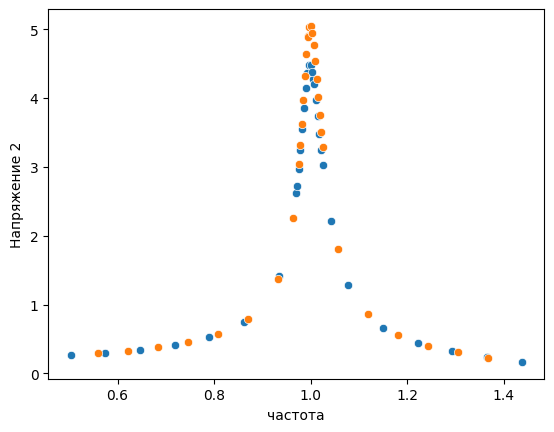

In [38]:
plt.figure()
sns.scatterplot(x=df["частота"]/27840, y=df["Напряжение 2"])
sns.scatterplot(x=df["частота.1"]/32200, y=df["Напряжение 2.1"])


In [33]:
df = pd.read_excel(
                "data/data.xlsx", 
                sheet_name="ФЧХ"
              )
df1 = pd.DataFrame([df["сдвиг фаз"], df["частота"]/32200]).transpose()
df2 = pd.DataFrame([df["сдвиг фаз.1"], df["частота.1"]/27840]).transpose()
df1

,сдвиг фаз,частота
0,0.073171,0.940994
1,0.085366,0.947205
2,0.097561,0.953416
3,0.123457,0.959627
4,0.137500,0.965839
5,0.175000,0.972050
6,0.212500,0.978261
7,0.278481,0.984472
8,0.358974,0.990683
9,0.461538,0.996894


<Axes: xlabel='частота', ylabel='сдвиг фаз'>

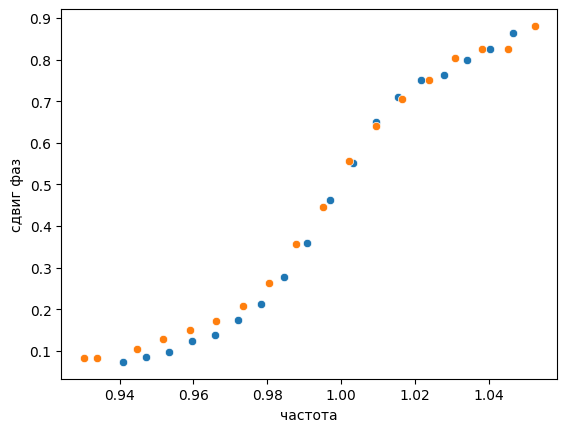

In [34]:
plt.figure()
sns.scatterplot(x=df1["частота"], y=df1["сдвиг фаз"])
sns.scatterplot(x=df2["частота.1"], y=df2["сдвиг фаз.1"])